In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/AirPassengers.csv")

# Konversi kolom 'Month' menjadi datetime
df["Month"] = pd.to_datetime(df["Month"])

# Set kolom 'Month' sebagai index
df.set_index("Month", inplace=True)

# Resample data per 4 bulan (4M)
resampled_data = df.resample('4M').sum()  # sum() digunakan untuk mengakumulasi jumlah penumpang per 4 bulan

# Target variabel yang ingin diprediksi
y = df['#Passengers']

# Tentukan index untuk split data (70% untuk training, 30% untuk testing)
split_index = int(len(y) * 0.7)

# Split data ke training dan testing set
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Print ukuran data train dan test untuk memverifikasi
print(f'Training Data Size: {len(y_train)}')
print(f'Testing Data Size: {len(y_test)}')

y


Training Data Size: 100
Testing Data Size: 44


C:\Users\Bilsyp\AppData\Local\Temp\ipykernel_16600\2541843743.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = df.resample('4M').sum()  # sum() digunakan untuk mengakumulasi jumlah penumpang per 4 bulan


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Latih model SARIMA
model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_model = model.fit()

# Prediksi dengan data test
predictions = sarima_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Cetak hasil prediksi
predictions


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1957-05-01    336.510886
1957-06-01    346.054372
1957-07-01    340.262147
1957-08-01    346.615872
1957-09-01    353.362701
1957-10-01    356.171039
1957-11-01    357.374956
1957-12-01    357.445120
1958-01-01    355.453474
1958-02-01    357.763960
1958-03-01    360.705450
1958-04-01    368.461396
1958-05-01    373.006310
1958-06-01    374.570769
1958-07-01    373.348349
1958-08-01    372.434478
1958-09-01    374.012483
1958-10-01    377.313733
1958-11-01    384.911630
1958-12-01    389.411980
1959-01-01    390.915335
1959-02-01    389.796693
1959-03-01    388.801199
1959-04-01    390.433996
1959-05-01    393.706866
1959-06-01    401.318498
1959-07-01    405.818964
1959-08-01    407.327706
1959-09-01    406.201675
1959-10-01    405.211834
1959-11-01    406.840860
1959-12-01    410.115735
1960-01-01    417.726355
1960-02-01    422.226924
1960-03-01    423.735267
1960-04-01    422.609732
1960-05-01    421.619517
1960-06-01    423.248791
1960-07-01    426.523532
1960-08-01    434.134221


In [6]:
predictions

1957-05-01    354.864961
1957-06-01    407.131040
1957-07-01    449.359188
1957-08-01    438.788743
1957-09-01    392.226699
1957-10-01    345.145078
1957-11-01    309.685900
1957-12-01    346.071269
1958-01-01    354.379571
1958-02-01    341.812271
1958-03-01    393.855055
1958-04-01    386.559401
1958-05-01    393.119039
1958-06-01    446.307216
1958-07-01    487.703107
1958-08-01    477.810974
1958-09-01    430.306002
1958-10-01    382.664281
1958-11-01    347.345566
1958-12-01    383.332785
1959-01-01    391.840539
1959-02-01    378.865780
1959-03-01    431.746200
1959-04-01    424.250529
1959-05-01    430.897014
1959-06-01    483.824135
1959-07-01    525.455555
1959-08-01    515.371499
1959-09-01    468.133234
1959-10-01    420.649857
1959-11-01    385.291446
1959-12-01    421.391239
1960-01-01    429.842601
1960-02-01    416.983058
1960-03-01    469.626615
1960-04-01    462.187503
1960-05-01    468.809431
1960-06-01    521.810372
1960-07-01    563.375190
1960-08-01    553.345405


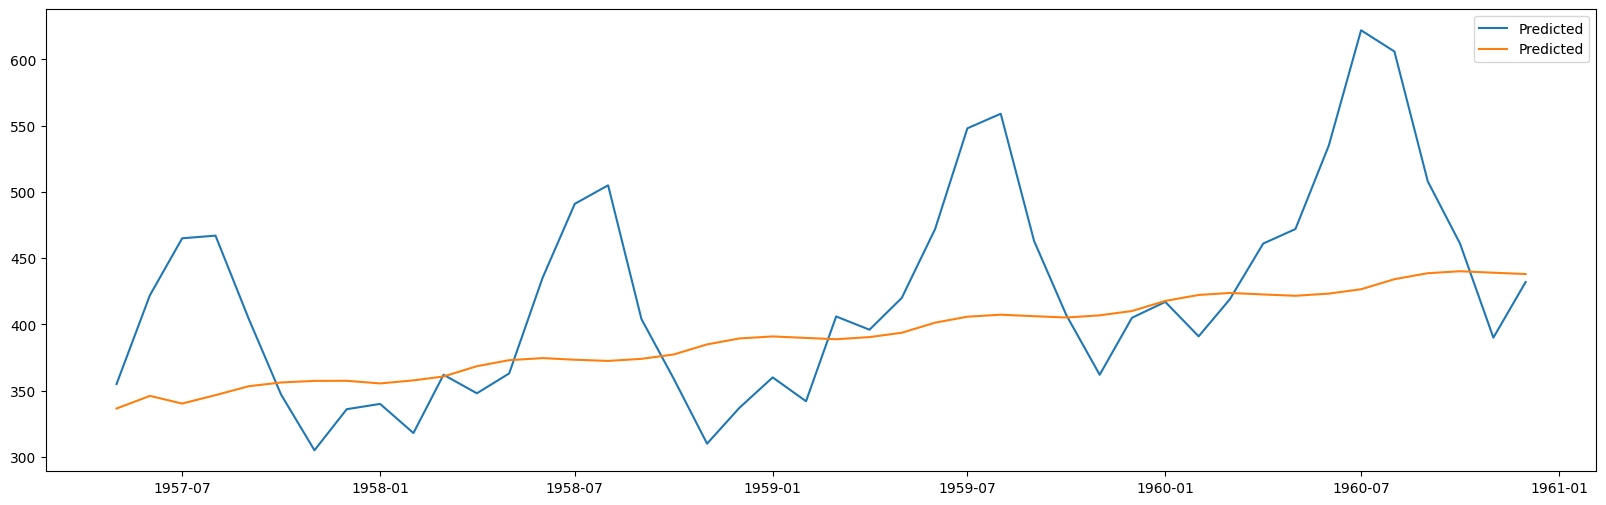

In [7]:
plt.figure(figsize=(20, 6))
plt.plot(y_test , label='Predicted')
plt.plot(predictions , label='Predicted')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(predictions,y_test)
r2

0.7991452934198141